In [23]:
from qiskit import QuantumCircuit, Aer, execute, IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

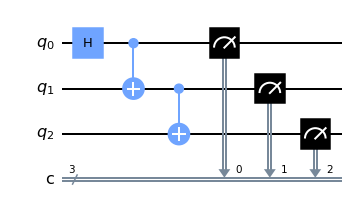

In [14]:
qc_error = QuantumCircuit(3, 3)
qc_error.h(0)
qc_error.cx(0, 1)
qc_error.cx(1, 2)
qc_error.measure(range(3), range(3))
qc_error.draw(output='mpl')

In [15]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc_error, backend, shots=1024).result()

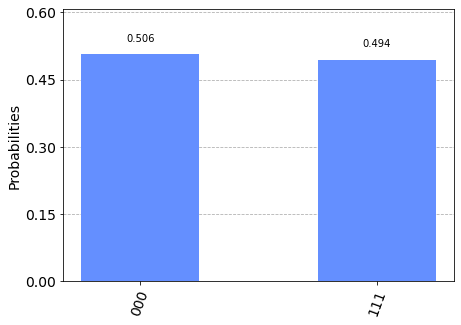

In [16]:
plot_histogram(result.get_counts())

In [19]:
IBMQ.load_account()

C:\Users\AB\Anaconda3\envs\quantum\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
provider = IBMQ.get_provider('ibm-q')
device = provider.get_backend('ibmq_ourense')
jobs = execute(qc_error, device, shots = 1024)
job_monitor(jobs)

Job Status: job has successfully run


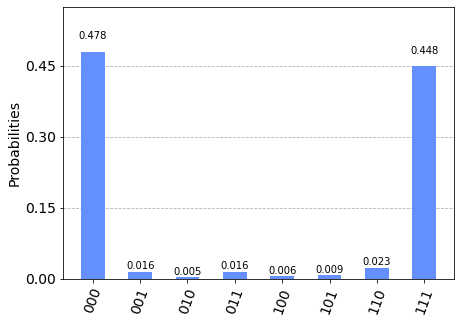

In [25]:
device_result = jobs.result()
plot_histogram(device_result.get_counts())

In [27]:

cal_circuits, state_labels = complete_meas_cal(qr=qc_error.qregs[0], 
                                               circlabel='measurement_calibration')

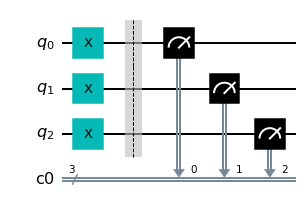

In [28]:
cal_circuits[7].draw(output='mpl')

In [29]:
len(cal_circuits)

8

In [30]:
cal_job = execute(cal_circuits,
             device,
             shots=8192,
             optimization_level=0)
job_monitor(cal_job)
cal_results = cal_job.result()

Job Status: job has successfully run


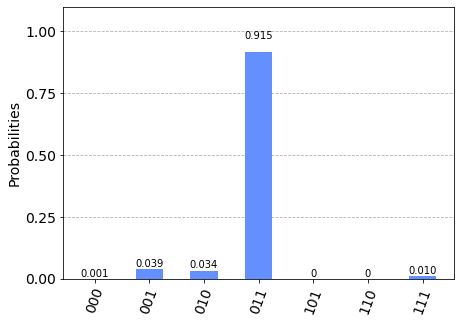

In [31]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [32]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

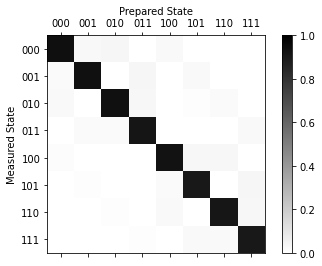

In [33]:
meas_fitter.plot_calibration()

In [34]:
meas_filter = meas_fitter.filter

In [35]:
mitigated_result = meas_filter.apply(device_result)

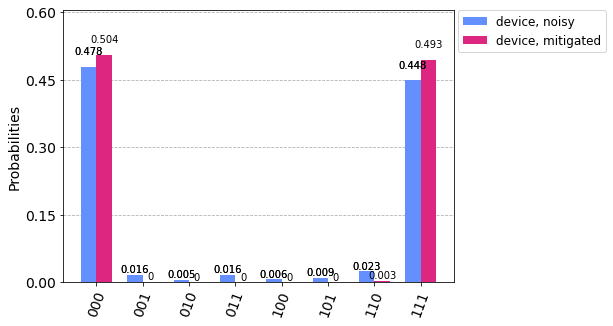

In [37]:
device_counts = device_result.get_counts(qc_error)
mitigated_counts = mitigated_result.get_counts(qc_error)
plot_histogram([device_counts, mitigated_counts], 
               legend=['device, noisy', 'device, mitigated'])

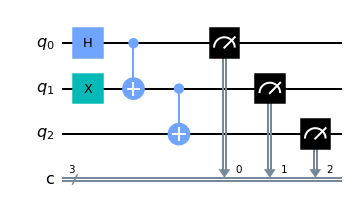

In [40]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure(range(3), range(3))
circuit2.draw(output='mpl')

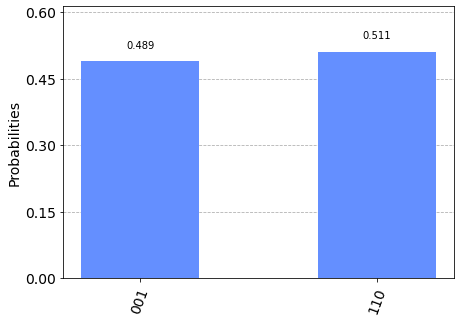

In [43]:
plot_histogram(
    execute(circuit2, backend, shots=1024).result().get_counts(circuit2)
)

In [44]:
device_counts_2 = execute(circuit2, device, shots=1024).result().get_counts(circuit2)

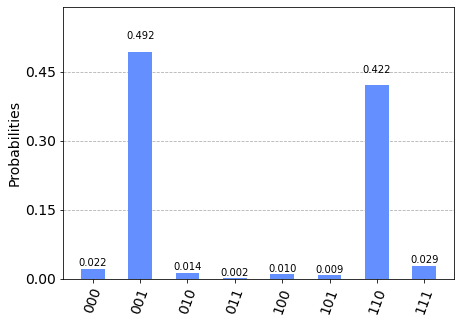

In [45]:
plot_histogram(device_counts_2)

In [46]:
mitigated_counts_2 = meas_filter.apply(device_counts_2)

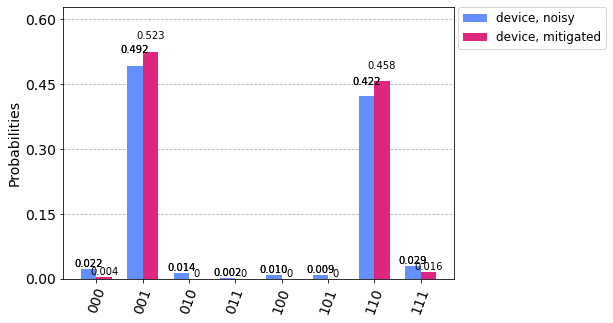

In [47]:
plot_histogram([device_counts_2, mitigated_counts_2], legend=['device, noisy','device, mitigated'])